### 웹툰 대표 이미지 & 회차별 이미지
- 1. 다운로드
- 2. 컬러, 컬러 --> 흑백
- 3. float 숫자화

In [36]:
import requests
from PIL import Image as pil
from IPython.display import clear_output
import os, time

In [2]:
# webtoon info
info = pd.read_csv("data_Juno/webtoon_naver_info_by_genres_seperated.csv")
info.tail()

,Unnamed: 0,unique_id,title_x,author,total_score,main_link,image_link,update_date,episode,omnibus,...,pure,sensibility,thrill,historical,sports,pay,episode_cnt,total_comments,episode_score,like_count
740,740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,None,None,...,pure,sensibility,None,None,None,0,224,201491,9.963036,76459
741,741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,None,None,...,None,None,None,None,None,0,20,10275,9.697000,13787
742,742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,None,None,...,None,sensibility,None,None,None,1,16,10191,9.746875,3564
743,743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,None,None,...,None,None,None,None,None,1,12,20984,9.854167,21366
744,744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,None,None,...,None,None,None,None,None,1,6,1374,7.354000,29


In [3]:
# webtoon 회차별
episode = pd.read_csv("data_Juno/episode_per_webtoon_naver.csv")
episode.tail()

,title,image_link,episode,titleid,episode_cnt,total_comments,episode_score,episode_like,upload_date
54723,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 5화 <침투(2)>,22073,5,419,8.93,7,2007-01-22
54724,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 4화 <침투(1)>,22073,4,384,9.00,6,2007-01-22
54725,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 3화 <화산>,22073,3,507,9.10,11,2007-01-22
54726,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 2화 <레이저 빔(2)>,22073,2,577,8.91,9,2007-01-22
54727,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 1화 <레이저 빔(1)>,22073,1,945,8.91,11,2007-01-22


now :  741
finished!!
now :  742
finished!!
now :  743
finished!!
now :  744
finished!!


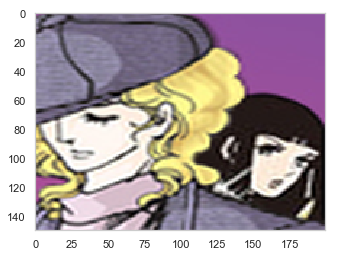

In [52]:
# 대표 이미지 컬러
for i in range(len(info)):
    print("now : ", i)
    response = requests.get(info['image_link'][i], stream=True).raw
    image = pil.open(response)
#     print(image.size)
    path = "./0_img/main_image_naver/" + str(info['unique_id'][i]) + ".png"
    plt.imshow(image.resize((200,150), pil.ANTIALIAS))
    plt.grid(False)
    image.resize((200,150), pil.ANTIALIAS).save(path)
    print("finished!!")
    if i % 10 == 0:
        clear_output()

In [42]:
# 대표 이미지 다운로드(흑백)
# 컬러 사진 불러오기(리스트)
# 흑백으로 바꿔서 넣는다.
cwd = os.getcwd()
path1 = cwd + "/0_img/main_image_naver/color/"
path2 = cwd + "/0_img/main_image_naver/gray/"
image_list = os.listdir(path1)

for i, image in enumerate(image_list):
    print("{}. file is [{}]".format(i,image), end='\r')
    pil_im = pil.open(path1 + image)
    pil_im.convert("L").save(path2 + image)

In [56]:
# 회차별 이미지 다운로드(컬러)
for i in range(len(episode)):
    print("now : ", i)
    response = requests.get(episode['image_link'][i], stream=True).raw
    image = pil.open(response)
    path = "./0_img/chapter_image_naver/color/" + str(episode['titleid'][i]) + "_"+ str(episode['episode_cnt'][i]) + ".png"
    image.resize((200,150), pil.ANTIALIAS).save(path)
    print("finished!!")
    if i % 10 == 0:
        clear_output()

now :  54721
finished!!
now :  54722
finished!!
now :  54723
finished!!
now :  54724
finished!!
now :  54725
finished!!
now :  54726
finished!!
now :  54727
finished!!


In [41]:
# 회차별 이미지 다운로드(흑백)
# 컬러 사진 불러오기(리스트)
# 흑백으로 바꿔서 넣는다.
cwd = os.getcwd()
path1 = cwd + "/0_img/chapter_image_naver/color/"
path2 = cwd + "/0_img/chapter_image_naver/gray/"
image_list = os.listdir(path1)

for i, image in enumerate(image_list):
    print("{}. file is [{}]".format(i,image), end='\r')
    pil_im = pil.open(path1 + image)
    pil_im.convert("L").save(path2 + image)